In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [143]:
data = pd.read_csv('data.csv')

In [144]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [145]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [146]:
#missing values
data.fillna(0,inplace=True)
#encoding
label_encoder = LabelEncoder()
colm_to_encode=['date','bedrooms','bathrooms','street', 'city','statezip','country']
for col in colm_to_encode:
    data[col] = label_encoder.fit_transform(data[col])
data.dtypes

date               int32
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street             int32
city               int32
statezip           int32
country            int32
dtype: object

In [147]:
#split data into x and y
X=data.drop(columns=['price'])
y=data['price']

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10)
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
#training model
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [138]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
date,1.650461e+04
bedrooms,-6.301046e+04
bathrooms,6.751732e+04
sqft_living,-1.874300e+16
sqft_lot,-2.576115e+04
floors,-5.760743e+03
waterfront,5.185718e+04
view,2.205334e+04
condition,1.985356e+04
sqft_above,1.676861e+16


In [150]:
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Abosulte Error is {mae}")

Mean Abosulte Error is 162913.50089844482


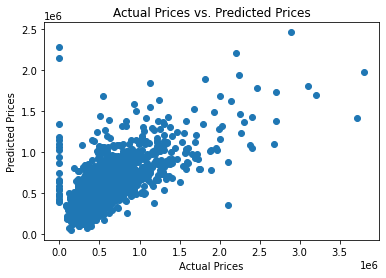

In [151]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [152]:
#model is ready for new data

new_data = pd.DataFrame({'date': ['2014-05-02 00:00:00'],
                         'bedrooms': [3.0],
                         'bathrooms': [1.50],
                         'sqft_living': [1340],
                         'sqft_lot': [7912],
                         'floors': [1.5],
                         'waterfront': [0],
                         'view': [0],'condition': [3],
                         'sqft_above': [1340],
                         'sqft_basement':[0],
                         'yr_built':[1955],
                         'yr_renovated':[2005],
                         'street':['18810 Densmore Ave N'],
                         'city':['Shoreline'],
                         'statezip':['WA 98133'],
                        'country':[' USA']})
colm_to_encode=['date', 'yr_built', 'yr_renovated', 'street', 'city','statezip', 'country']
for col in colm_to_encode:
    new_data[col] = label_encoder.fit_transform(new_data[col])
    
new_data_scaled=scaler.transform(new_data)

predicted_price = model.predict(new_data_scaled)
print(f"predicted price: {predicted_price[0]}")

predicted price: 4092406.8749015536
